In [13]:
!uv pip install pandas numpy scikit-learn seaborn matplotlib scipy

Using Python 3.11.2 environment at: /home/zaq/proj/venv
Audited 6 packages in 21ms


In [14]:
import pandas as pd


laptops=pd.read_csv("laptopPrice.csv")

In [15]:
laptops.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [16]:
laptops.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [17]:
laptops.shape

(823, 19)

1. There are no null-values in the dataset


In [18]:
laptops.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
os_bit               object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [19]:
laptops['ram_gb'] = laptops['ram_gb'].str.split().str.get(0).astype(int)

laptops['ssd'] = laptops['ssd'].str.split().str.get(0).astype(int)
laptops['hdd'] = laptops['hdd'].str.split().str.get(0).astype(int)
laptops['graphic_card_gb'] = laptops['graphic_card_gb'].str.split().str.get(0).astype(int)
laptops['rating'] = laptops['rating'].str.split().str.get(0).astype(int)
laptops['os_bit'] = laptops['os_bit'].str.replace('-bit', '',regex=False).astype(int)

In [20]:
laptops['os_bit'] = 64

In [21]:
cat_cols = laptops.select_dtypes(include='object')
num_cols = laptops.select_dtypes(include="number")

In [22]:
cat_cols.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_type', 'os', 'weight', 'warranty', 'Touchscreen', 'msoffice'],
      dtype='object')

In [23]:
## exploratory data analysis

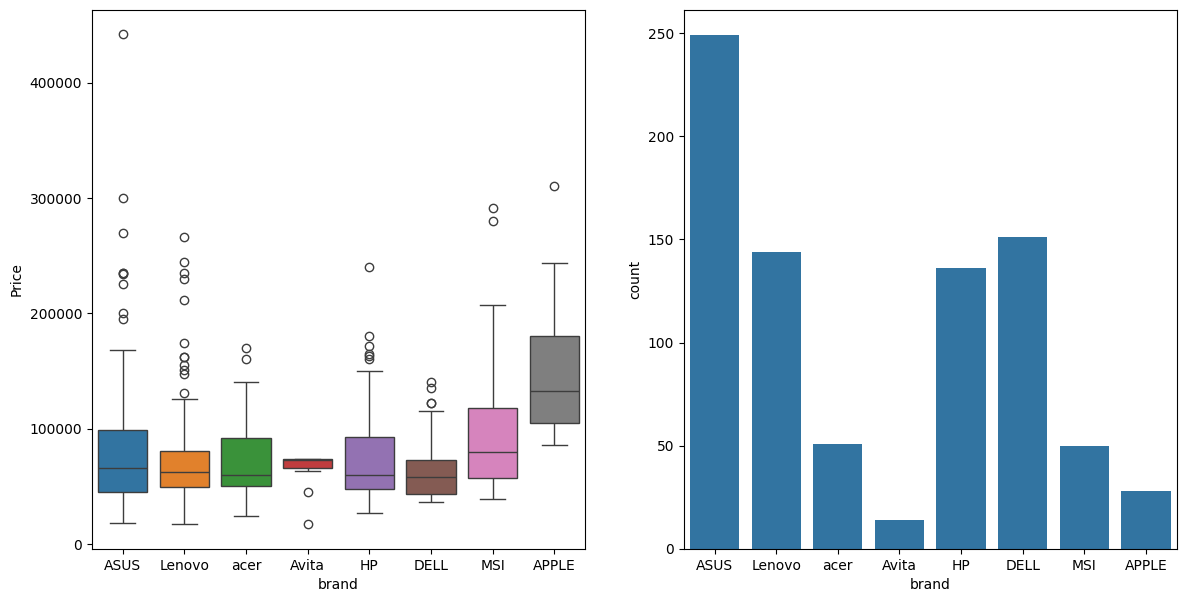

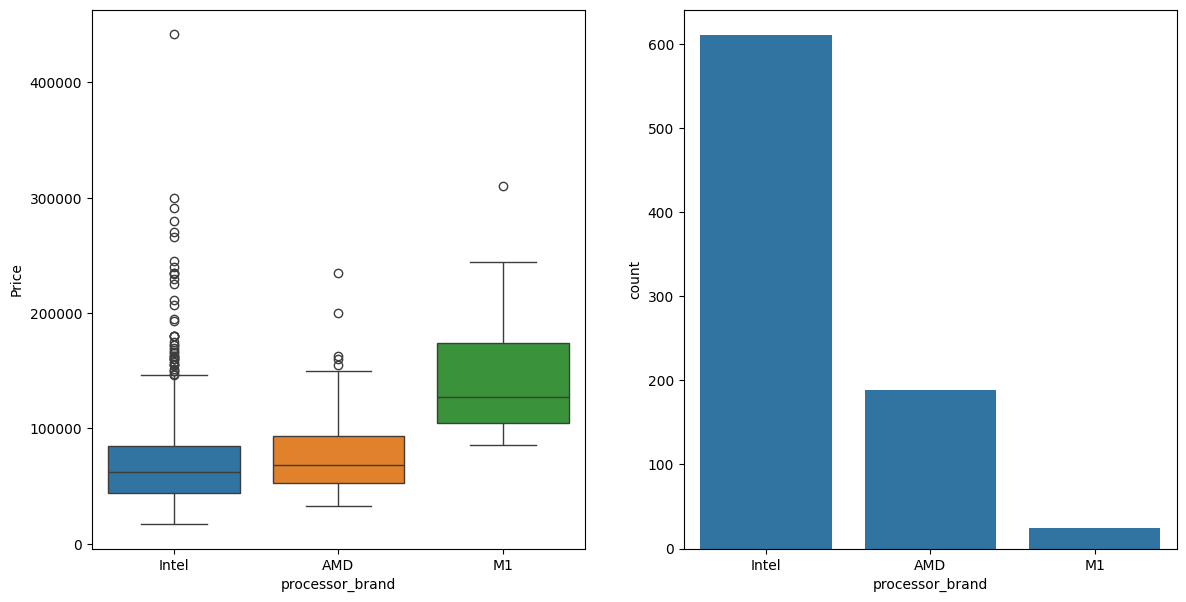

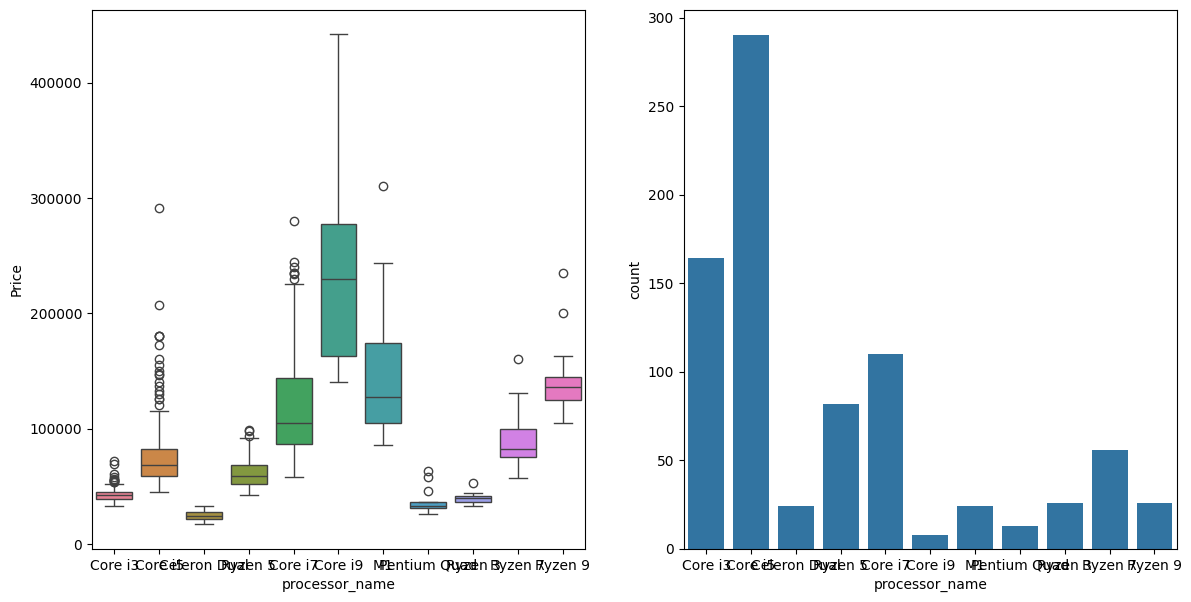

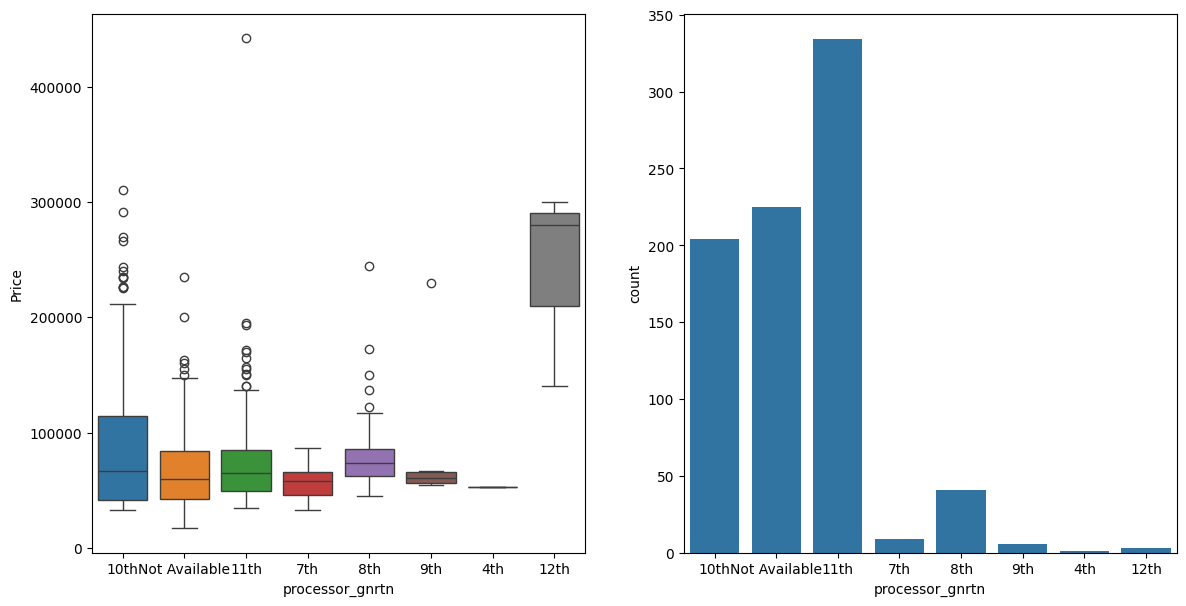

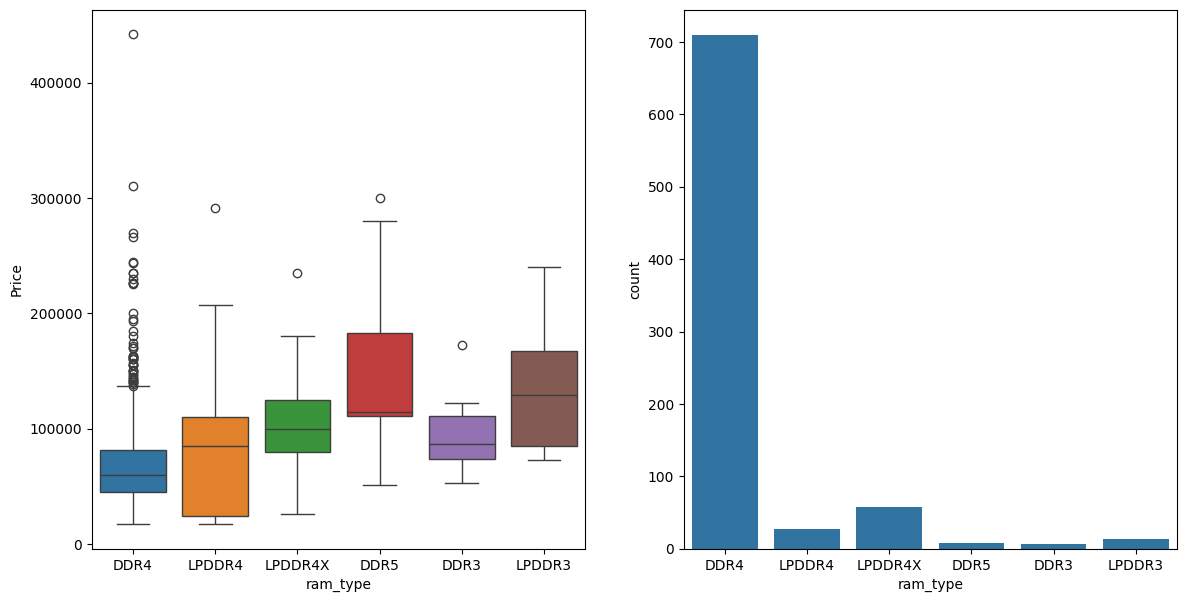

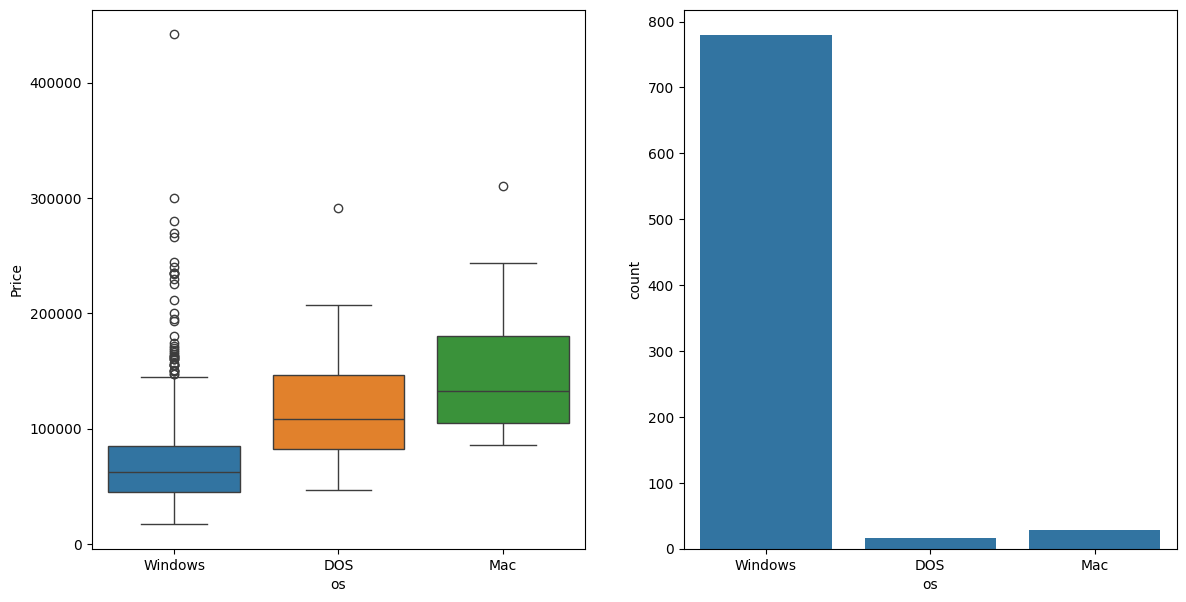

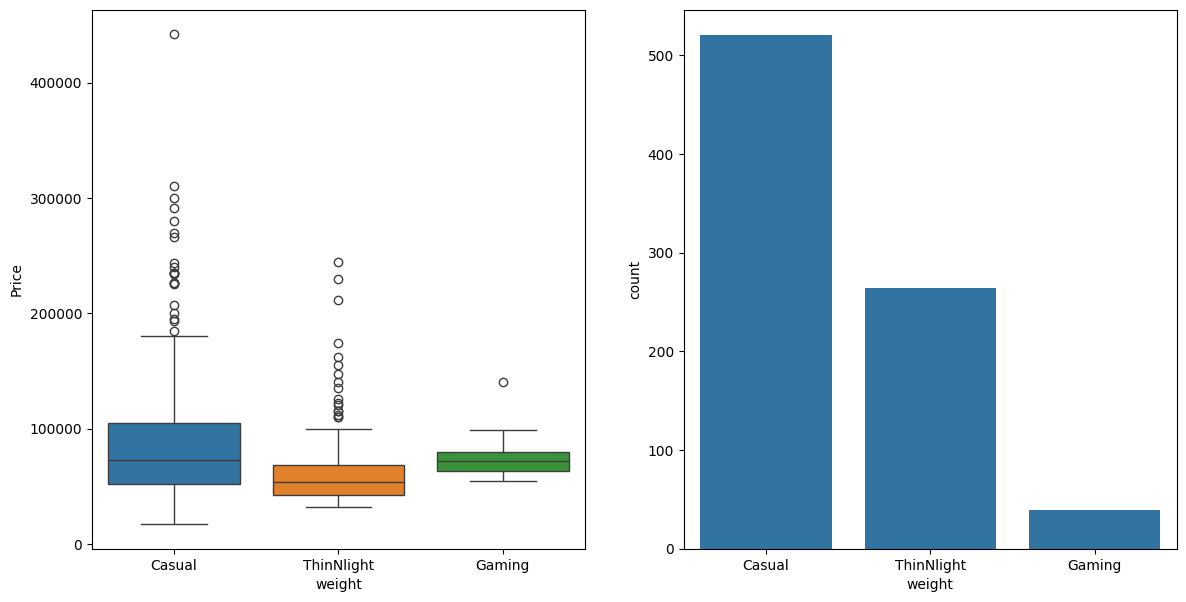

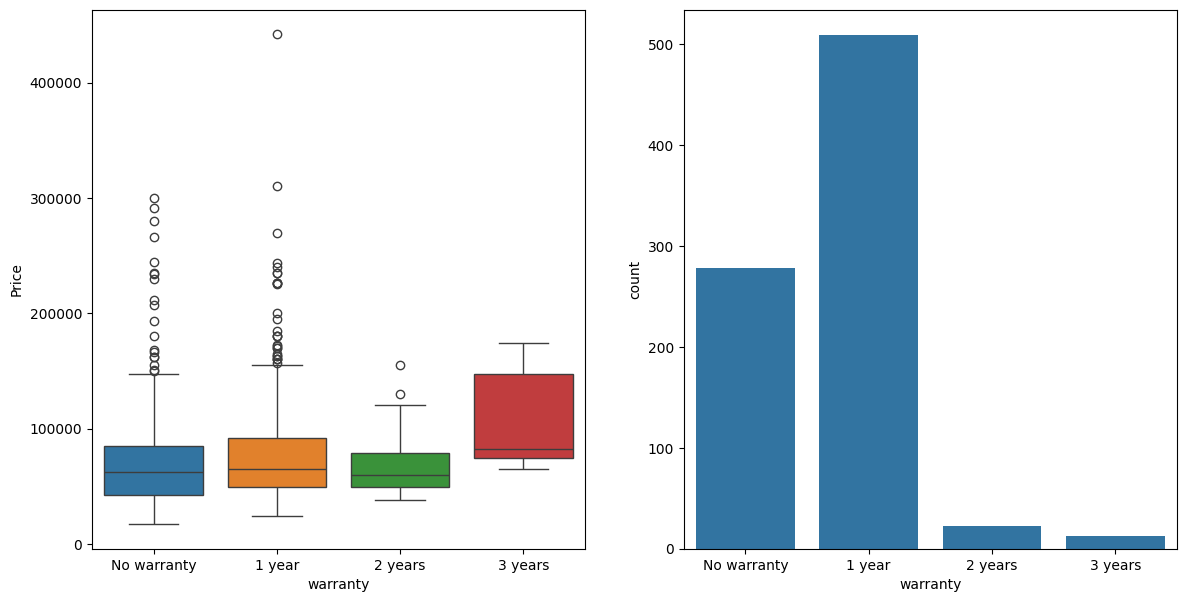

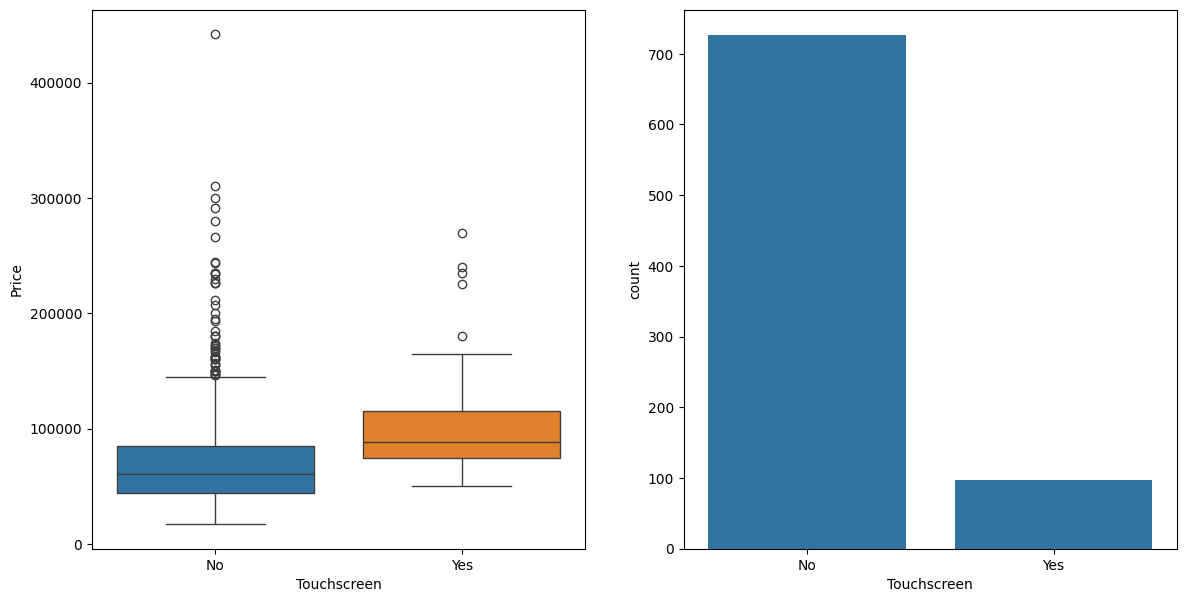

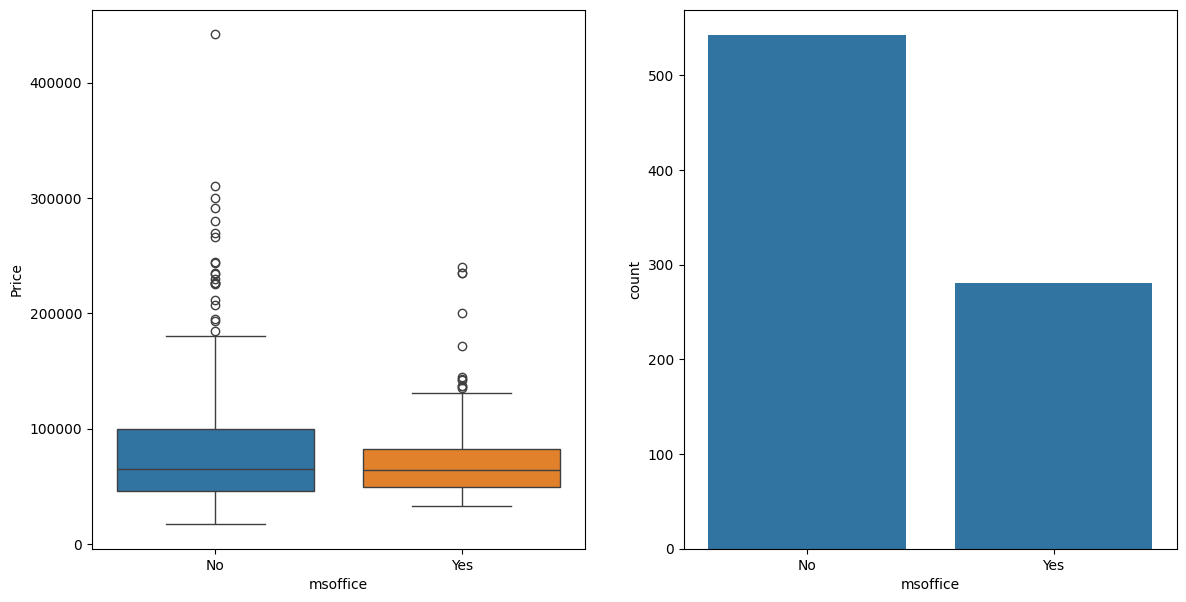

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in cat_cols:
  fig,axes=plt.subplots(nrows=1,ncols=2, figsize=(14,7))
  sns.countplot(ax=axes[1],x=laptops[feature])
  sns.boxplot(ax=axes[0],x=laptops[feature],y=laptops.Price,hue=laptops[feature])
plt.show()

### OBSERVATIONS
1. AMD seems to be highly represented in the dataset.
2. Core i9 seems to be the most expensive processor but core i3 and core i5 are highly represented.
3. M1 processors are expensive but intel processors are highly represented
4. 10 th and 11 gen processors are more represented.
5. Majority laptops have 8GB RAM. 32GB is very expensive.
6. 2TB hdd is very expensive but most laptops have 512GB hdd.
7. DDR5 is very expensive but DDR4 is very much prevalent.
8. Mac OS is found in expensive laptops but windows is majorly used in most laptops.
9. Median price of 64 bit OS is high and 64 bit OS is most prevalent.
10. 8GB graphics card laptop are very expensive but most Laptops dont have a graphics card in the present dataset.
11. Casual laptops have wide range of prices various gaming laptops are expensive. Casual laptops are mostly used.
12. Most laptops have 1year warranty. Expensive laptops have 3years warranty.
13. Most do not have touch screen. Touchscreen laptops are expensive.
14. 5 stars laptop are expensive while 3 and 4 stars are mostly found.

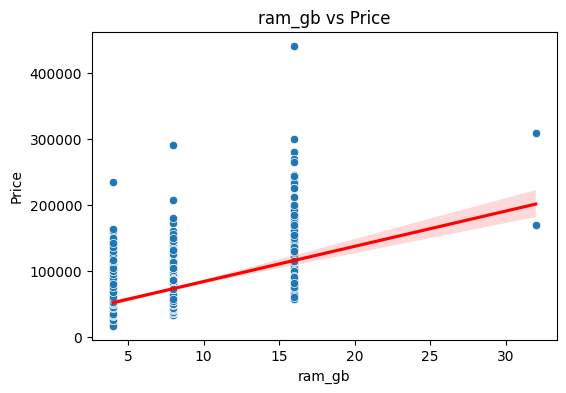

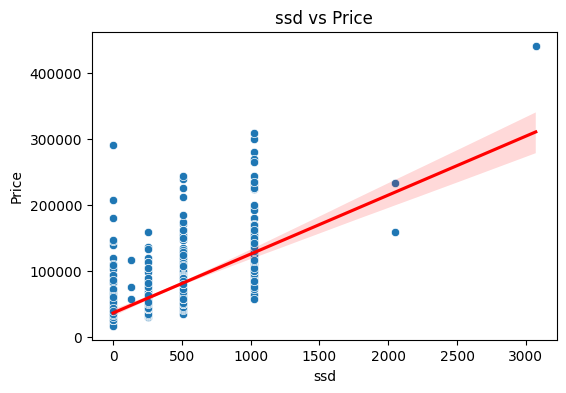

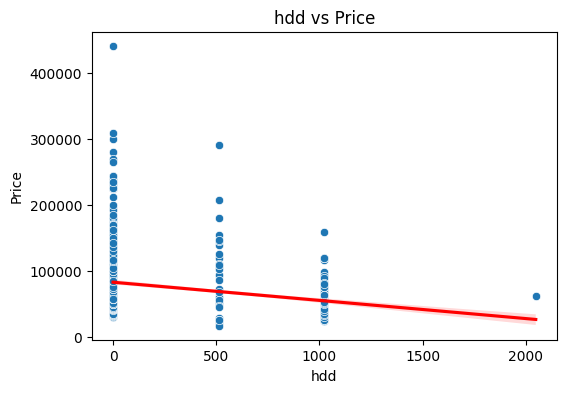

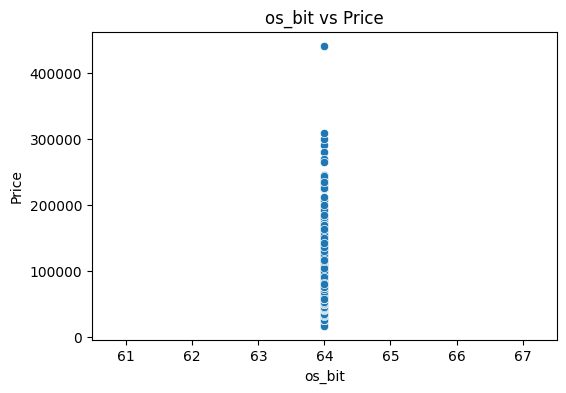

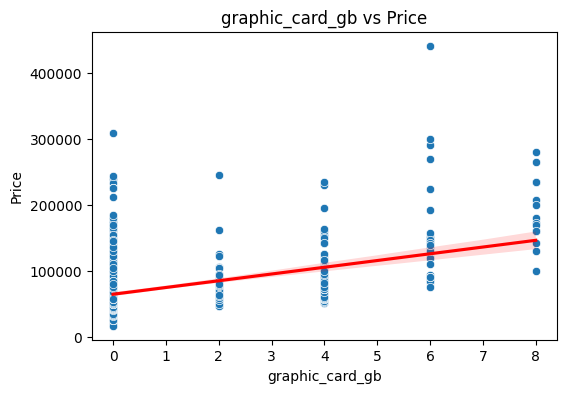

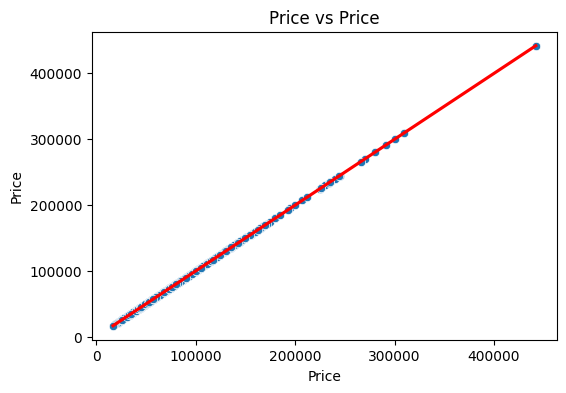

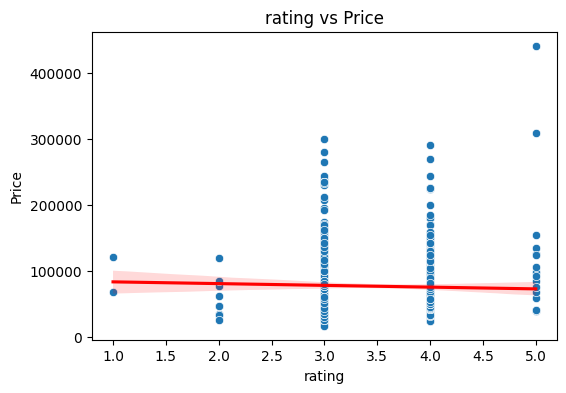

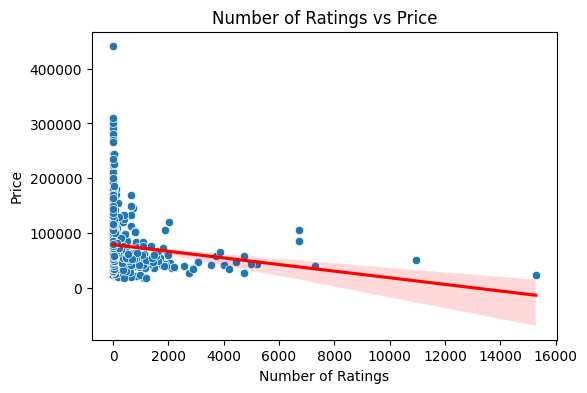

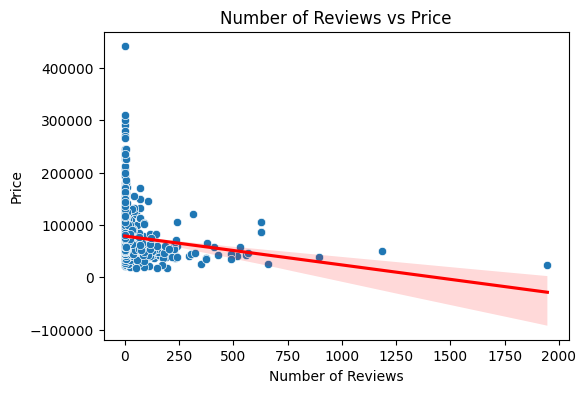

In [27]:
for feature in num_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=laptops, x=feature, y='Price')
    sns.regplot(data=laptops, x=feature, y='Price', scatter=False, color='red')  # regression line
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

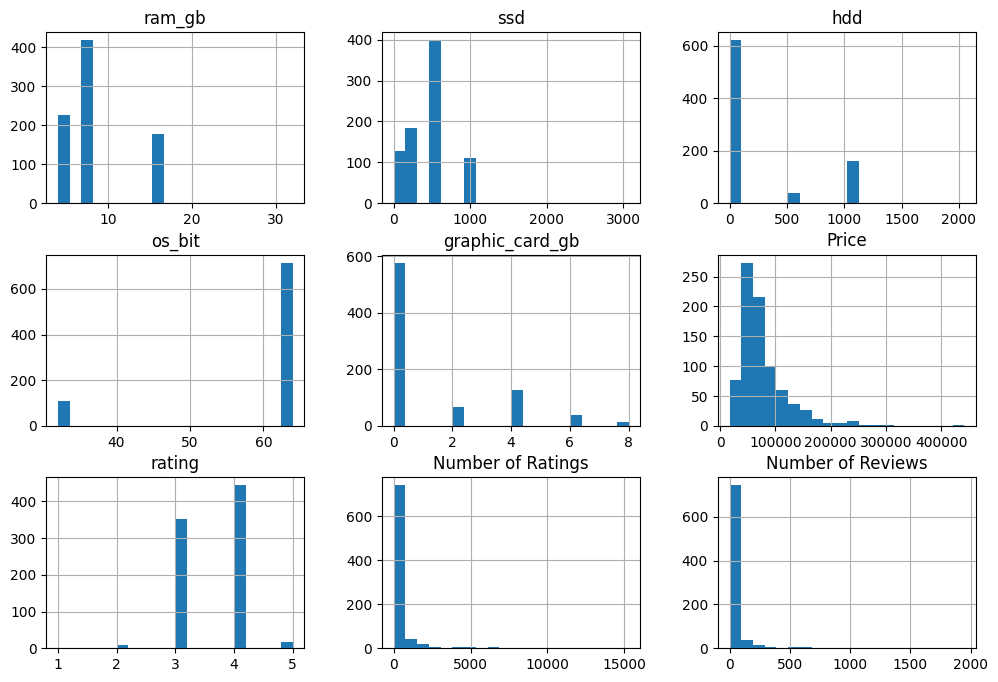

In [439]:
laptops[num_cols.columns].hist(figsize=(12,8), bins=20)
plt.show()

## OBSERVATIONS
1. Number of ratings has negative correlation with laptop price
2. Number of reviews has negative correlation with laptop Price
3. The numerical features are all right skewed

### REMOVING OUTLIERS

In [28]:
def z_score_anti_outlier(x, mean, std, threshold=3):
    z_score = (x - mean) / std
    if z_score > threshold or z_score < -threshold:
        return False
    else:
        return True


In [29]:
for feature in num_cols:
    mean = laptops[feature].mean()
    std = laptops[feature].std()
    laptops = laptops[(laptops[feature] - mean).abs() <= 3*std]

In [30]:
laptops.shape

(748, 19)

In [31]:
laptops.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [32]:
laptops.to_csv("cleaned_laptops.csv")

In [33]:
## Extracting Training Data

In [34]:
X = laptops.drop(columns=['Price'])
y = laptops['Price'].values.reshape(-1, 1)

In [35]:
X

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,2,3,0
1,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,3,65,5
2,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,3,8,1
3,ASUS,Intel,Core i5,10th,8,DDR4,512,0,Windows,64,2,Casual,No warranty,No,No,3,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0,512,Windows,64,0,Casual,No warranty,No,No,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64,0,Casual,1 year,No,No,3,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64,0,Casual,1 year,No,No,3,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64,4,Casual,1 year,No,No,3,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64,4,Casual,1 year,No,No,3,0,0


In [39]:
laptops['os']

0      Windows
1      Windows
2      Windows
3      Windows
4      Windows
        ...   
818    Windows
819    Windows
820    Windows
821    Windows
822        DOS
Name: os, Length: 748, dtype: object

Applying Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [41]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()
ohe.fit(X[X.columns])

,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


Creating a column transformer to transform categorical columns

In [42]:
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, categorical_cols),
        ('num', num_transformer, numeric_cols)
    ],
)

target_scaler = StandardScaler().fit(y)

### Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
y_train_scaled = target_scaler.transform(y_train)
y_test_scaled = target_scaler.transform(y_test)

In [44]:
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [45]:
model.fit(X_train, y_train_scaled)

# Predict on test set
y_pred_scaled = model.predict(X_test)

# Inverse transform predictions to original scale
y_pred = target_scaler.inverse_transform(y_pred_scaled)

In [46]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)



0.8088471571631753

In [47]:
laptops.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb                int64
ram_type             object
ssd                   int64
hdd                   int64
os                   object
os_bit                int64
graphic_card_gb       int64
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating                int64
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [48]:
from sklearn.metrics import r2_score

scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=i
    )

    target_scaler.fit(y_train.reshape(-1, 1))
    y_train_scaled = target_scaler.transform(y_train.reshape(-1, 1))

    model.fit(X_train, y_train_scaled)

    y_pred_scaled = model.predict(X_test)


    y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

    # Evaluate in original scale
    scores.append(r2_score(y_test, y_pred))


In [49]:
laptops.iloc[1]

brand                     Lenovo
processor_brand            Intel
processor_name           Core i3
processor_gnrtn             10th
ram_gb                         4
ram_type                    DDR4
ssd                            0
hdd                         1024
os                       Windows
os_bit                        64
graphic_card_gb                0
weight                    Casual
warranty             No warranty
Touchscreen                   No
msoffice                      No
Price                      38999
rating                         3
Number of Ratings             65
Number of Reviews              5
Name: 1, dtype: object

In [51]:
import numpy as np
np.argmax(scores)

np.int64(687)

In [52]:
scores[np.argmax(scores)]  #index same as iteration

0.9011415023032445

### FINAL TRAIN

In [53]:
from sklearn.metrics import r2_score

scores = []

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=687
)

target_scaler.fit(y_train.reshape(-1, 1))
y_train_scaled = target_scaler.transform(y_train.reshape(-1, 1))

model.fit(X_train, y_train_scaled)

y_pred_scaled = model.predict(X_test)


y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))


In [54]:
y_pred_scaled=model.predict(pd.DataFrame(columns=['brand','processor_brand','processor_name','processor_gnrtn','ram_gb','ram_type','ssd','hdd','os','os_bit','graphic_card_gb','weight','warranty','Touchscreen','msoffice','rating','Number of Ratings','Number of Reviews'],
                          data=np.array(['ASUS','Intel',"Core i3","10th",4,"DDR4",0,1024,'Windows',64,0,'Casual','No warranty','No','No',2,3,0]).reshape(1,18)))

In [55]:
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1,1))

In [56]:
y_pred

array([[44856.85532475]])

In [57]:
import pickle

In [59]:
pickle.dump(model,open('LinearRegressionModelLaptop.pkl','wb'))
